In [73]:
import pandas as pd # data processing, CSV I/O handling.
import numpy as np
import matplotlib.pyplot as plt

print("Notebook is working")


Notebook is working


# **1. Introduction**
The purpose of this project is for me to practice using python as an analysis tool. 

## 1.1. Data Inspection
***Disclaimer**: The data used in this project may not be entirely accurate.*
- There's no credited source of this dataset.
- Data is up to 2021.

We'll first inspect the raw data that we have obtained. By using `os` module, we'll be able to interact with underlying operating system, such as viewing and accessing directories.

In [74]:
import os
# Ensure working directory is the project root (Netflix_Movies)
PROJECT_ROOT = os.path.abspath("Netflix_Movies")

# If we're already inside Netflix_Movies, this is harmless
if not os.getcwd().endswith("Netflix_Movies"):
    os.chdir(PROJECT_ROOT)

os.getcwd()

'd:\\2. Areas\\Career_Exploration\\Data_Analyst\\Python\\Kaggle_Notebooks\\Netflix_Movies'

We have found the data. Let's read the file and asign its content into the variable `df`.

In [75]:
df = pd.read_csv("Data/netflix_titles.csv.zip")

Let's first check what the data looks like using `head`.

In [76]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


Using `df.head()`, we can see that there are only two types of data here, either each row represents a Movie or a TV Show. Some values seem to be missing, indicated by the "NaN"s. 

In [77]:
df.shape

(8807, 12)

Using `df.shape` we can see the dimension of the file. These numbers tell us that the data has 12 rows with 8,807 obvervations.

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


Using `df.info()` we can see the summary of each column, like their:
- total row numbers
- total column numbers
- data type
- number of missing values

The dataset contains 12 columns and 8,807 observations (rows).
Most columns are stored as `object` types, with `release_year` being the only numeric column (`int64`).

Some columns contain missing values, including `director`, `cast`, `country`, `date_added`, `rating`, and `duration`. These columns will need to be treated before further processing.

---

# **2. Identifying Areas of Analysis**
Since this project serves as practice for data analysis, we will be exploring some possible areas of analysis that can be driven out of the data set. Below is a list of things we can analyze based on what we have:

1. **Movies vs TV Shows**

    The differences between the amount of movies versus tv shows being included in Netflix could possibly tell us what kind of show Netflix has chosen to include. Either they prefer movies more or tv shows more.
2. **Rating Types**

    The amount of shows that each type of rating has could tell us the kinds of shows Netflix tend to include. For example, highest show rating could be TV-MA, which means that Netflix tend to distribute more Mature-themed tv shows than others. 
3. **Popular Directors**
    
    The amount of directors could tell us which director's works has been the most included in Netflix's listings. Further analysis could be done to identify specific reasons why these directors are included more often than others.
4. **Date Added**
    
    With this we could possibly see Netflix's patterns of adding shows into their listings. Could be seasonal updates or cyclical or totally random.

---

# **3. Analyzing Data**
In this section, we'll be doing the data processing and analysis for each area.

## **3.1. Movies vs TV Shows**
>*How is Netflix's catalog split between Movies and TV Shows?*

For this analysis, we will be seeing how many titles are Movies and how many are TV Shows. All we need to do is a simple aggregation method for the `type` column.

### 3.1.1. Data Processing

Below is the code used:

In [79]:
type_counts = df["type"].value_counts()
# Get grouped counts of show type
# Assign to a variable for future use

# See result:
type_counts

type
Movie      6131
TV Show    2676
Name: count, dtype: int64

**Explanation of `df["type"].value_counts()`**

- `df["type"]` - selects one column from the data frame.
- it groups identical values.
- counts how many time each appears.
- automatically sorts results from **most** frequent to **least** frequent.

### 3.1.2. Plot
Since the `type` column contains *categorical* data, we will be using a **bar chart**. 

<Axes: title={'center': 'Distribution of Netflix Content by Type as of 2021'}, xlabel='Content Type', ylabel='Number of titles'>

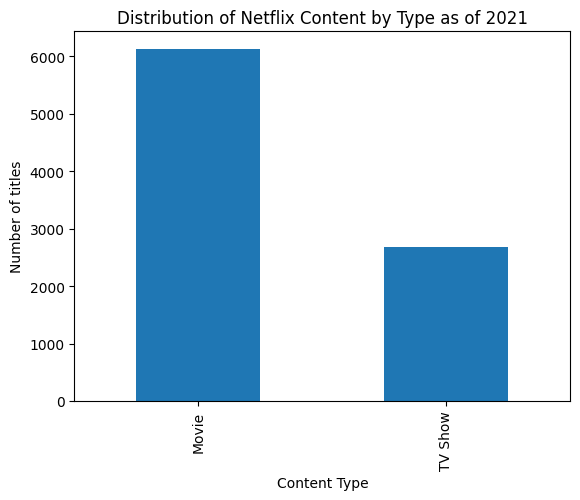

In [80]:
# Bar chart plot
type_counts.plot(
    kind="bar",
    title="Distribution of Netflix Content by Type as of 2021",
    ylabel="Number of titles",
    xlabel="Content Type"
)

### 3.1.3. Analysis
By counting the number of titles by content type, we can see that, as of 2021, Netflix's catalog significantly contains more Movies than of TV Shows. There's no other value other than `Movie` or `TV Show`, which means that the values are clean. This result simply shows the content of Netflix's catalog, not necessarily subscribers' preferences.

## **3.2. Rating Types**
>*What is the distribution of content ratings in Netflix's catalog?*

For this analysis we will be doing 2 analysis:
1. How many titles fall under each rating type?
2. Which rating type is more prominent within each show type?

An important note before we start is that Netflix has their own rating systems that they apply across all their shows. For example, `TV-MA` and `TV-14` are types that apply to both Movie and TV Shows, despite the "TV" part of the names. As a result, these ratings will be interpreted as general maturity classifications rather than format-specific labels.

### 3.2.1. Data Processing
We will be doing a similar thing to the previous analysis, by using `value_counts` to see the overall distribution. Then we will group the rating types by their show types.

**Important!**

A thing we need to note is that the `rating` data has some missing values. Since the amount of missing values is so small compared to the overall dataset, we'll just ignore them and count the non-missing ones.

In [81]:
# Rating distribution across all shows
rating_counts = df["rating"].value_counts() 

**Explanation:**

- `df["type"]` - selects one column from the data frame.
- it groups identical values.
- counts how many time each appears.
- automatically sorts results from **most** frequent to **least** frequent.

In [82]:
# Rating distribution grouped by show type
rating_by_type_counts = df.groupby("type")["rating"].value_counts().unstack()

# Sort (reorder) the columns from most common to least common
rating_by_type_counts = rating_by_type_counts[
    rating_by_type_counts.sum().sort_values(ascending=False).index
]

**Explanation:**

- `df.groupby("type")["rating"]` - groups `rating` values by `type`.
- `unstack()` - converts the `rating` counts into **columns** (turning into a dataframe).
    - Column: rating types
    - Rows: show types
- `rating_by_type_counts.sum()` - sums **down the rows** (gives total number of titles per rating across Movies + TV Shows).
- `sort_values(ascending=False)` - sorts the ratings from **most** common to **least** common.
- `index` - extracts the sorted column headers and used

`rating_by_type_counts[ ]` basically says "Give me the columns of `rating_by_type_counts` in this *exact order*.". **It returns a new dataframe but with rearranged columns**.

### 3.2.2. Plot
Since `rating` is also a *categorical* data, we will be using **bar charts** again.

<Axes: title={'center': 'Distribution of Rating Types Across All Netflix Titles Based on Show Types'}, xlabel='Rating Types per Show Type', ylabel='Number of Titles'>

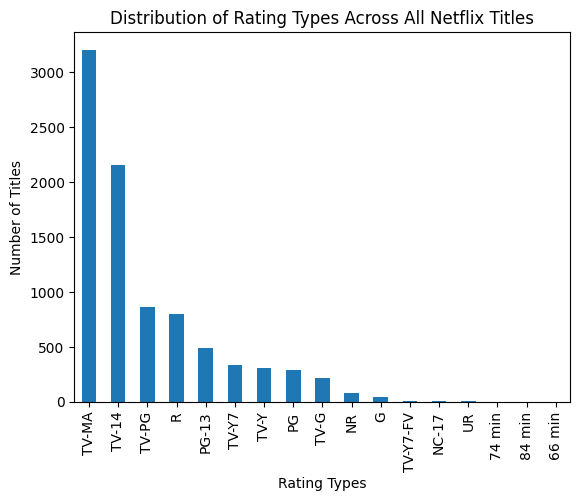

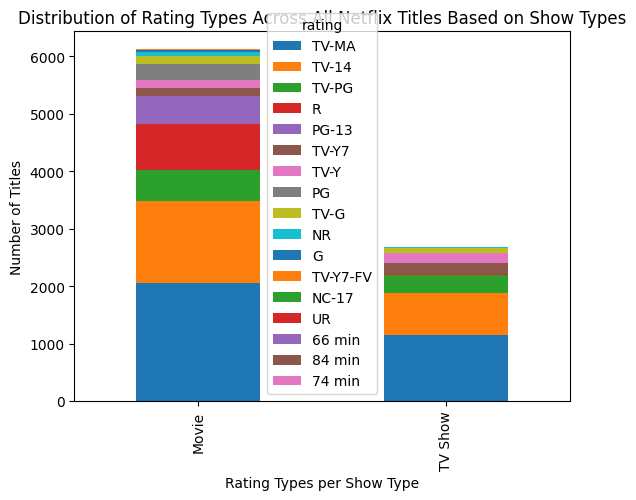

In [83]:
# Rating distribution plot
rating_counts_plot = rating_counts.plot(
    kind="bar",
    title="Distribution of Rating Types Across All Netflix Titles",
    ylabel="Number of Titles",
    xlabel="Rating Types"
)

# Grouped rating distribution plot
rating_by_type_counts.plot(
    kind="bar", 
    stacked=True,
    title="Distribution of Rating Types Across All Netflix Titles Based on Show Types",
    ylabel="Number of Titles",
    xlabel="Rating Types per Show Type"
)

### 3.2.3. Analysis
The distribution of rating types, either simply across all titles or grouped by show types, mostly stays consistent, with `TV-MA` and `TV-14` being the top 2 most common type in Netflix's catalog. This could mean that Netflix, as a whole, is catered more towards young adults and mature audiences. 

It can be observed, as well, that there are similar rating types, like `TV-PG` and `PG` and others like it, and both apply to Movie despite the "TV" in the rating's name. These different yet similar ratings are possibly caused by different rating systems that Netflix applies across its catalog, which resulted in overlapping labels that represent similar maturity levels but originate from different classification standards.

In [84]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


## **3.3. Popular Directors**
For this particular column, there seem to be a few problems.

In [85]:
df["director"].isna().value_counts()

"""
director
False    6173
True     2634
Name: count, dtype: int64
"""

'\ndirector\nFalse    6173\nTrue     2634\nName: count, dtype: int64\n'

As we can see, the are **2,634 missing values** in this column. That is too many for us to casually ignore. The values are also categorical data, not numerical, so we can't impute the missing values. Since there's no meaningful way to deal with this issue, we'll be analyzing rows that do have values.

>*Among Netflix titles with recorded director information, which diretors appear most frequently?*

### 3.3.1. Data Processing
We'll first need to **filter the data** to only ones **with recorded director names**.

In [86]:
# Filter out missing directors
non_missing_director = df[df["director"].notna()]
non_missing_director

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
...,...,...,...,...,...,...,...,...,...,...,...,...
8801,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan","March 9, 2016",2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


Once we have the filtered out data, we can simply do `.value_counts()` again to find how many times each director's name appear.

In [87]:
# Count of director names
non_missing_director_count = non_missing_director["director"].value_counts()
non_missing_director_count

director
Rajiv Chilaka              19
Raúl Campos, Jan Suter     18
Marcus Raboy               16
Suhas Kadav                16
Jay Karas                  14
                           ..
Mu Chu                      1
Chandra Prakash Dwivedi     1
Majid Al Ansari             1
Peter Hewitt                1
Paul Raschid                1
Name: count, Length: 4528, dtype: int64

Reminder, the result provided by the code shows the director names **with available records**. It seems that Rajiv Chilaka, in the available records, is the most prominent director.

### 3.3.2. Plot

<Axes: title={'center': "Top 15 Director in Netflix's Catalog From the Available Dataset"}, xlabel='Director Names', ylabel='Number of Titles'>

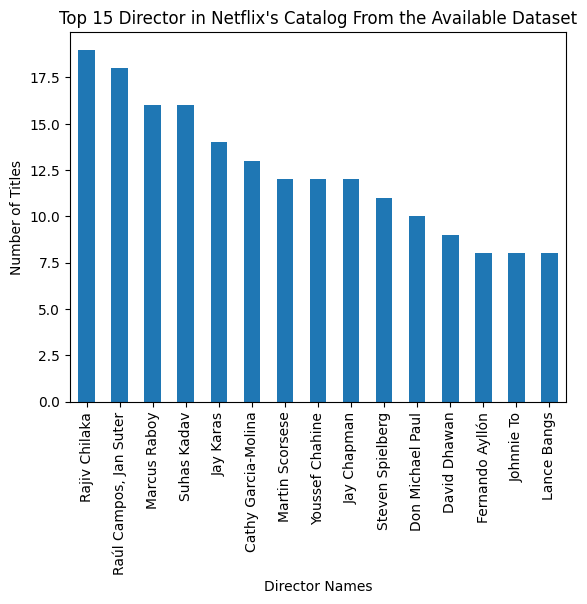

In [88]:
# Take the top 15 of the director names count
top_15_non_missing_director = non_missing_director_count.head(15)

# Plot it
top_15_non_missing_director.plot(
    kind="bar",
    title="Top 15 Director in Netflix's Catalog From the Available Dataset",
    ylabel="Number of Titles",
    xlabel="Director Names"
)

This plot shows the top 15 directors names that appear most frequently in the dataset. However, we need to keep in mind that these are only names that are recorded in the metadata, so this data is incomplete.

### 3.3.3. Analysis
Initial inspection and processing reveal that the most common directors inin the available data tend to be associated with South Asian productions. However, immediately something amiss can be found in the plot in the previous section. Steven Spielberg's name only appears 12 times, when in reality, without needing any deeper analysis, he has directed dozens of movies. This alone warants more investigation towards. 

Further analysis was done on the rows with missing director names. 

In [89]:
# Get countries of missing director names
missing_dir = df[df["director"].isna()]             # Slice df to get only missing-director rows
country_of_missing_dir = missing_dir["country"]     # Take just the "country" column 
country_of_missing_dir.value_counts()               # Get count of each

"""
country
United States                                    770
United Kingdom                                   207
Japan                                            160
South Korea                                      150
India                                             82
                                                ... 
Germany, United States, Italy                      1
United Kingdom, United States, Czech Republic      1
Russia, Spain                                      1
Japan, Canada                                      1
United States, France, South Korea, Indonesia      1
Name: count, Length: 188, dtype: int64
"""

'\ncountry\nUnited States                                    770\nUnited Kingdom                                   207\nJapan                                            160\nSouth Korea                                      150\nIndia                                             82\n                                                ... \nGermany, United States, Italy                      1\nUnited Kingdom, United States, Czech Republic      1\nRussia, Spain                                      1\nJapan, Canada                                      1\nUnited States, France, South Korea, Indonesia      1\nName: count, Length: 188, dtype: int64\n'

From this processing, it is revealed that the 2,634 missing director names consist of shows that originated from Western and East Asian countries, including United States, United Kingdom, Japan, and South Korea. As a result, this whole analysis is subject to selection bias, as it reflects only titles that are recorded in the metadata rather than the full Netflix catalog.

There could be multiple reasons as to why this is the case:

- Incomplete data collection by whoever initially collected the data.
- Western shows tend to have different directors for different show episodes, thus not being able to show just one name.
- South Asian shows and smaller productions tend to have one director.

In conclusion, this analysis is done using very incomplete, and possibly biased data set. Thus the result of the analysis can't be seen as a whole.

## 3.4. Date Added
>*Are there any patterns to how Netflix update their catalog? If yes, what are they?*

For this analysis, we will be looking at when Netflix do updates and see if there are any meaningful patterns we can find. This could reveal to us whether Netflix udpates seasonaly, cyclicaly (weekly, monthly, or yearly), random, or specific pattern alltogether. 

### 3.4.1. Data Processing
There are multiple ways to check whether the pattern may be seasonal or cyclical or other patterns. Easiest to do first is to figure out how to break the dates down into seasons and cycles. We will do Yearly first. Then Monthly, which could also reveal seasonal patterns. Then Weekly last.

##### Data Cleaning
Before doing anything else, let's check for what the data looks like. We'll mainly see if there date formats are consistent and whether there are any missing values.

In [90]:
# Format checking
df["date_added"].value_counts()

date_added
January 1, 2020      109
November 1, 2019      89
March 1, 2018         75
December 31, 2019     74
October 1, 2018       71
                    ... 
June 15, 2014          1
November 18, 2017      1
February 8, 2016       1
October 21, 2018       1
 June 1, 2018          1
Name: count, Length: 1767, dtype: int64

Based on the result above, it seems that they are all using the same format. However, it can be found that there's **a date that has a leading space**, for example the "June 1, 2018". We'll need to remove leading and trailing white spaces.

In [91]:
df["date_added"].isna().value_counts()

date_added
False    8797
True       10
Name: count, dtype: int64

Based on the result, there are **10 observations with missing `date_added` values**. This amount, however, is miniscule compared to the total amount of observations. Thus, it's **safe to ignore**. 

In [92]:
# FIlter out missing date_added rows
valid_df_date_added = df[df["date_added"].notna()].copy()      # Use this dataframe moving forward

We'll then be removing whitespaces and checking for special characters

In [93]:
# Strip whitespaces
valid_df_date_added["date_added"] = valid_df_date_added["date_added"].str.strip()


`.str.strip()` - removes leading and trailing whitespaces.

In [ ]:
# Detect special characters
mask_special = valid_df_date_added["date_added"].str.contains( 
    r"[^A-Za-z0-9 ,]",      # Includes letters, numbers, spaces, commas
    regex=True  
)

Series([], Name: date_added, dtype: object)

- `mask_special` - produce a series of boolean masks for each cell in `date_added`
- `[^...]` - "check for anything NOT in this set". 
- `regex=True` - If a cell meets the `[^...]` criteria, masked as `True`.

In [ ]:
# Remove rows with special characters
valid_df_date_added.loc[mask_special,"date_added"]

`.loc[mask_special,"date_added"]`
- `mask_special` - **Row selector**. The series of boolean values that tells which rows to keep.
- `"date_added"` - **Column selector**. The column on which the filtering is applied to.

Lastly we'll be converting the `date_added` values to datetime format.

In [95]:
# Convert to datetime
valid_df_date_added["date_added"] = pd.to_datetime(valid_df_date_added["date_added"])

### A. Yearly
The first breakdown we'll do is yearly. We'll be seeing how many titles were added into Netflix's catalog each year. Through this, we'll be able to see whether there are any yearly updating cycle or season.

In [ ]:
# Extract eyar and count title
updated_by_year = (
    valid_df_date_added["date_added"]
    .dt.year                            # Extract year number from each datetime value
    .value_counts()                     # Count how many titles
    .sort_index()                       # Sort the year, otherwise it will sort by count values
)

updated_by_year

date_added
2008       2
2009       2
2010       1
2011      13
2012       3
2013      11
2014      24
2015      82
2016     429
2017    1188
2018    1649
2019    2016
2020    1879
2021    1498
Name: count, dtype: int64

#### Plot

<Axes: title={'center': 'Number of titles added by Year'}, xlabel='Year', ylabel='Number of titles'>

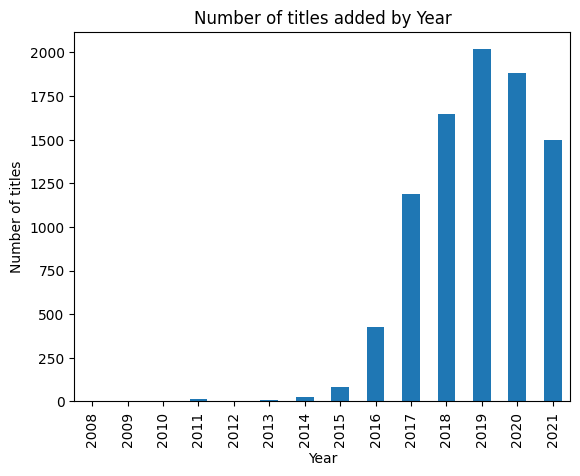

In [ ]:
updated_by_year.plot(
    kind="bar",
    title="Number of titles added by Year",
    ylabel="Number of Titles Added",
    xlabel="Year"
)

From the graph above, the earliest recorded title addition dates to 2008. This loosely aligns with the historical fact that in 2007 the streaming service became available, changing the business model significantly, though the dataset itself does not provide information on early catalog completeness. 

A sharp increase in title additions begins around 2015, with particularly large growth between 2016 and 2018.

A slight dip in quantity started in 2020 and continued to fall considerably after 2019. However, 2021 data is incomplete as it is only up Septeber of 2021.